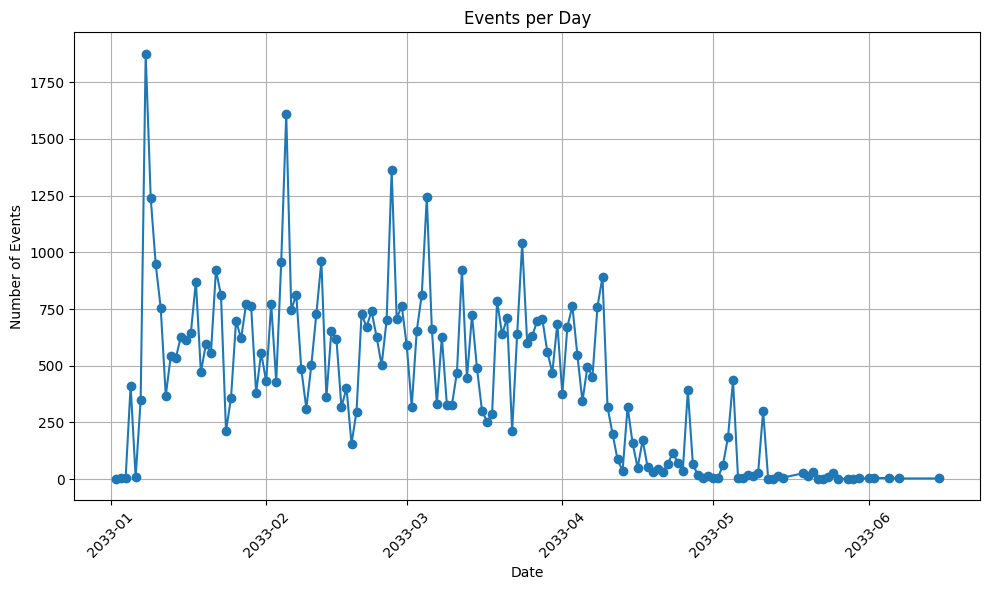

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Load the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\sarda\Desktop\UBC\Course\Learning_Analytics_Hackathon\github_files\hack-la-2023\Pattern Pioneers\data\navigation_events.csv')

# Display the first few rows of the DataFrame
df.head()

# Get basic information about the DataFrame
# df_info = df.info()

# Summary statistics of the data
# summary_statistics = df.describe()

# Visualize the data
df['event_time'] = pd.to_datetime(df['event_time'])

# Group the events by day and count the number of events per day
daily_events = df['event_time'].dt.date.value_counts().sort_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(daily_events.index, daily_events.values, marker='o', linestyle='-')
plt.title('Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)

# Display the graph
plt.tight_layout()
plt.show()

In [91]:
data_path = r'C:\Users\sarda\Desktop\UBC\Course\Learning_Analytics_Hackathon\github_files\hack-la-2023\Pattern Pioneers\data\additional'
navigation_events = pd.read_csv(r'C:\Users\sarda\Desktop\UBC\Course\Learning_Analytics_Hackathon\github_files\hack-la-2023\Pattern Pioneers\data\navigation_events.csv')
assignments = pd.read_csv(data_path + r'\assignments.csv')
discussion_topics = pd.read_csv(data_path + r'\discussion_topics.csv')
discussions = pd.read_csv(data_path + r'\discussions.csv')
enrollments = pd.read_csv(data_path + r'\enrollments.csv')
files = pd.read_csv(data_path + r'\files.csv')
gradebook = pd.read_csv(data_path + r'\gradebook.csv')
module_items = pd.read_csv(data_path + r'\module_items.csv')
pages = pd.read_csv(data_path + r'\pages.csv')

In [92]:
#eda on navigation_events
#navigation_events.event_time as datetime
navigation_events.event_time = pd.to_datetime(navigation_events.event_time)

In [93]:
assignments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         9 non-null      object 
 1   due_at                     7 non-null      object 
 2   due date                   7 non-null      object 
 3   due time                   7 non-null      object 
 4   unlock_at                  0 non-null      float64
 5   lock_at                    0 non-null      float64
 6   points_possible            9 non-null      int64  
 7   grading_type               9 non-null      object 
 8   position                   9 non-null      int64  
 9   name                       9 non-null      object 
 10  submission_types           9 non-null      object 
 11  has_submitted_submissions  9 non-null      bool   
 12  workflow_state             9 non-null      object 
 13  published                  9 non-null      bool   
dty

In [94]:
gradebook.describe


<bound method NDFrame.describe of        Student  Assignment 1 (c81f04547a95da2a7b88054ef491b7c4)  \
0    LEARNER_4                                               88   
1   LEARNER_10                                               88   
2   LEARNER_34                                               90   
3   LEARNER_16                                               88   
4    LEARNER_7                                               92   
5   LEARNER_30                                               77   
6   LEARNER_15                                               90   
7   LEARNER_19                                               90   
8   LEARNER_36                                               56   
9    LEARNER_8                                               90   
10  LEARNER_20                                               82   
11  LEARNER_13                                               88   
12  LEARNER_37                                               94   
13  LEARNER_17              

In [95]:
#group navigation events by actor_id
navigation_events.groupby('actor_id').size().sort_values(ascending=False).head(10)

actor_id
UNKN_3        4421
LEARNER_13    3687
INSTRUCTOR    3215
LEARNER_8     2878
LEARNER_6     2801
LEARNER_7     2497
LEARNER_29    2222
LEARNER_11    2188
LEARNER_2     1981
LEARNER_12    1901
dtype: int64

<Axes: xlabel='actor_id'>

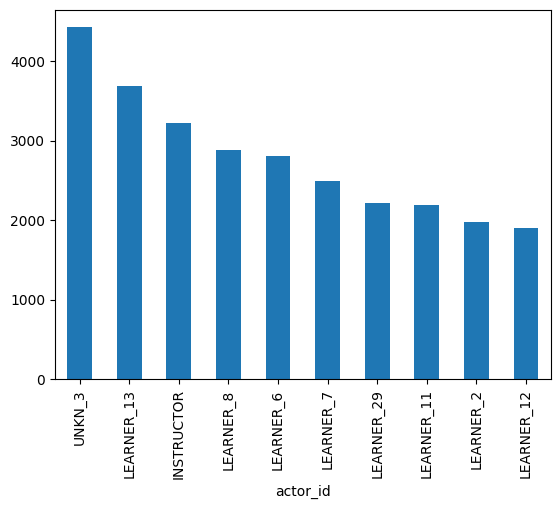

In [96]:
#plot time interacted for each actor id
navigation_events.groupby('actor_id').event_time.count().sort_values(ascending=False).head(10).plot(kind='bar')

In [97]:
gradebook.rename(columns={'Student': 'actor_id'}, inplace=True)

In [98]:
data = pd.read_excel(r'C:\Users\sarda\Desktop\UBC\Course\Learning_Analytics_Hackathon\github_files\hack-la-2023\Pattern Pioneers\data\excel_data.xlsx')

In [99]:
# Define a function to categorize hours into parts of the day
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Load the data (assuming the data is still loaded from before, so we can skip this step)
# data = pd.read_excel('/mnt/data/excel_data.xlsx')

# Ensure 'date' and 'time' are treated as strings and combine them into a single datetime column
data['date'] = data['date'].astype(str)
data['time'] = data['time'].astype(str)
data['discussion_datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], errors='coerce')
# Assume the 'discussion_datetime' is in UTC, convert to PST
data['discussion_datetime'] = data['discussion_datetime'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')

# Extract the day of the week and hour from 'discussion_datetime'
data['discussion_day_of_week'] = data['discussion_datetime'].dt.day_name()
data['discussion_hour'] = data['discussion_datetime'].dt.hour

# Filter the dataset for discussion events using non-null values in discussion-related columns
discussion_data = data[data[['discussion_topic_message_length', 'post_message_length']].notnull().any(axis=1)]

# Apply the categorize_hour function to the 'discussion_hour' column to get the part of the day
discussion_data['part_of_day'] = discussion_data['discussion_hour'].apply(categorize_hour)

# Group by the day of the week and part of the day, count the number of discussion events
discussion_counts = discussion_data.groupby(['discussion_day_of_week', 'part_of_day']).size().reset_index(name='count')

# Pivot the table to get the desired format
discussion_pivot = discussion_counts.pivot(index='part_of_day', columns='discussion_day_of_week', values='count')

# Reorder the columns to have the days in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
discussion_pivot = discussion_pivot[days_order]

# Reorder the rows to have the parts of the day in the correct order
parts_of_day_order = ['Morning', 'Afternoon', 'Evening', 'Night']
discussion_pivot = discussion_pivot.reindex(parts_of_day_order)

# Replace NaN with 0 for better visualization
discussion_pivot.fillna(0, inplace=True)

# Display the pivot table
discussion_pivot


C:\Users\sarda\AppData\Local\Temp\ipykernel_15660\2190074260.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discussion_data['part_of_day'] = discussion_data['discussion_hour'].apply(categorize_hour)


discussion_day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
part_of_day,,,,,,,
Morning,161,114,116,84,131,321,124
Afternoon,8,20,13,63,37,20,47
Evening,215,211,151,151,148,89,32
Night,386,336,846,438,438,436,308


In [201]:
# Convert the pivot table back to a long format (unpivoted) with 'day' and 'count' as separate columns
discussion_long_format = discussion_pivot.reset_index().melt(id_vars='part_of_day', var_name='day', value_name='count')


,part_of_day,day,count
0,Morning,Monday,161
1,Afternoon,Monday,8
2,Evening,Monday,215
3,Night,Monday,386
4,Morning,Tuesday,114
5,Afternoon,Tuesday,20
6,Evening,Tuesday,211
7,Night,Tuesday,336
8,Morning,Wednesday,116
9,Afternoon,Wednesday,13


In [100]:
import pandas as pd

# Define a function to categorize hours into parts of the day
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Load the data (assuming the data is still loaded from before)
# data = pd.read_excel('/mnt/data/excel_data.xlsx')

# Ensure 'date' and 'time' are treated as strings and combine them into a single datetime column
data['date'] = data['date'].astype(str)
data['time'] = data['time'].astype(str)
data['discussion_datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], errors='coerce')

# Assume the 'discussion_datetime' is in UTC, convert to PST
data['discussion_datetime'] = data['discussion_datetime'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')

# Extract the day of the week and hour from 'discussion_datetime'
data['discussion_day_of_week'] = data['discussion_datetime'].dt.day_name()
data['discussion_hour'] = data['discussion_datetime'].dt.hour

# Filter the dataset for discussion events using non-null values in discussion-related columns
discussion_data = data[data[['discussion_topic_message_length', 'post_message_length']].notnull().any(axis=1)].copy()

# Apply the categorize_hour function to the 'discussion_hour' column to get the part of the day
discussion_data['part_of_day'] = discussion_data['discussion_hour'].apply(categorize_hour)

# Create bins for 2-hour intervals starting from 8 AM
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
bin_labels = [
    '12 AM - 1:59 AM', '2 AM - 3:59 AM', '4 AM - 5:59 AM',
    '6 AM - 7:59 AM', '8 AM - 9:59 AM', '10 AM - 11:59 AM',
    '12 PM - 1:59 PM', '2 PM - 3:59 PM', '4 PM - 5:59 PM',
    '6 PM - 7:59 PM', '8 PM - 9:59 PM', '10 PM - 11:59 PM'
]

# Cut the 'discussion_hour' into bins
discussion_data['time_bin'] = pd.cut(discussion_data['discussion_hour'], bins=bins, labels=bin_labels, right=False)

# Group by the day of the week and time_bin, count the number of discussion events
discussion_bin_counts = discussion_data.groupby(['discussion_day_of_week', 'time_bin']).size().reset_index(name='count')

# Pivot the table to get the desired format
discussion_bin_pivot = discussion_bin_counts.pivot(index='time_bin', columns='discussion_day_of_week', values='count')

# Reorder the columns to have the days in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
discussion_bin_pivot = discussion_bin_pivot[days_order]

# Replace NaN with 0 for better visualization
discussion_bin_pivot.fillna(0, inplace=True)

# Display the pivot table
discussion_bin_pivot
#give data in a column for days and the values
discussion_bin_pivot


discussion_day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
time_bin,,,,,,,
12 AM - 1:59 AM,33,59,173,150,102,185,161
2 AM - 3:59 AM,82,78,262,129,149,63,0
4 AM - 5:59 AM,51,51,148,43,106,89,41
6 AM - 7:59 AM,60,42,0,49,54,110,37
8 AM - 9:59 AM,52,51,32,30,14,114,60
10 AM - 11:59 AM,17,21,66,0,20,60,9
12 PM - 1:59 PM,4,20,0,40,15,9,0
2 PM - 3:59 PM,4,0,13,0,22,5,47
4 PM - 5:59 PM,85,55,27,59,14,20,8


In [202]:
# Convert the pivot table back to a long format (unpivoted) with 'day' and 'count' as separate columns
discussion_long_format_time = discussion_bin_pivot.reset_index().melt(id_vars='time_bin', var_name='day', value_name='count')


In [203]:

discussion_long_format.to_csv(r'C:\Users\sarda\Desktop\UBC\Course\Learning_Analytics_Hackathon\github_files\hack-la-2023\Pattern Pioneers\data\discussion_long_format.csv')
discussion_long_format_time.to_csv(r'C:\Users\sarda\Desktop\UBC\Course\Learning_Analytics_Hackathon\github_files\hack-la-2023\Pattern Pioneers\data\discussion_long_format_time.csv')

In [199]:
# Correct the filtering for the 'Learner' role
learners_corrected = data[data['membership_role'] == '["Learner"]']
#learners_corrected = learners_corrected.dropna(subset=['actor_id', 'event_time'])
# Convert event_time to datetime
learners_corrected['event_time'] = pd.to_datetime(learners_corrected['event_time'])

# Calculate the maximum and minimum event times for each learner and then find the duration of engagement
event_time_range = learners_corrected.groupby(['actor_id', learners_corrected['event_time'].dt.date]).agg({
    'event_time': ['max', 'min']
}).reset_index()

# Calculate the time engaged as the difference between the max and min times
event_time_range['time_engaged'] = (event_time_range[('event_time', 'max')] - 
                                    event_time_range[('event_time', 'min')])

# Since we're interested in the total engagement time per learner, we'll group by 'actor_id' again and sum the engagement times
total_engagement_time = event_time_range.groupby('actor_id')['time_engaged'].sum().reset_index()
total_engagement_time.columns = ['actor_id', 'time_engaged']

# Aggregate the discussion posts data for learners
learner_discussion_posts = learners_corrected.groupby('actor_id').agg({
    'count of posts': 'sum',  # Total number of posts per learner
    'post_message_length': 'mean'  # Average message length per learner
}).reset_index()

# Identify the columns related to assignment scores and participation score
score_columns = [col for col in data.columns if 'score' in col.lower() and ('current' in col.lower() or 'participation' in col.lower())]

# Aggregate the scores for each learner by calculating the mean score
learner_scores = learners_corrected.groupby('actor_id')[score_columns].mean().reset_index()

# Merge the discussion posts data, scores, and total engagement time
learner_complete_data = pd.merge(learner_discussion_posts, learner_scores, on='actor_id', how='left')
learner_complete_data = pd.merge(learner_complete_data, total_engagement_time, on='actor_id', how='left')

# Convert the time_engaged to a numerical value (total seconds) for correlation analysis
learner_complete_data['time_engaged_seconds'] = learner_complete_data['time_engaged'].dt.total_seconds()

# Standardize the features to be used in the engagement metric
engagement_features = learner_complete_data[['count of posts', 'post_message_length', 'time_engaged_seconds']]
scaler = StandardScaler()
standardized_features = scaler.fit_transform(engagement_features)


C:\Users\sarda\AppData\Local\Temp\ipykernel_15660\3648095977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  learners_corrected['event_time'] = pd.to_datetime(learners_corrected['event_time'])


In [200]:

# Calculate the engagement metric
learner_complete_data['engagement_metric'] = standardized_features.mean(axis=1)
learner_complete_data['Assignment_score'] = learner_complete_data[['Assignment 1 Current Score', 'Assignment 2 Current Score','Assignment 3 Current Score']].mean(axis=1)
learner_complete_data.rename(columns={'Participation & engagement Current Score': 'Participation Score','Current Score': 'Total Score'}, inplace=True)
learner_complete_data.dropna(inplace=True)
learner_complete_data.to_csv(r'C:\Users\sarda\Desktop\UBC\Course\Learning_Analytics_Hackathon\github_files\hack-la-2023\Pattern Pioneers\data\learner_complete_data.csv')


In [181]:
# Calculate the correlation matrix including the new engagement metric
correlation_matrix = learner_complete_data[['Participation Score', 'Total Score','engagement_metric']].corr()
correlation_matrix_assignments = learner_complete_data[['Participation Score', 'Assignment 1 Current Score', 'Assignment 2 Current Score',
       'Assignment 3 Current Score','Assignment_score','engagement_metric']].corr()

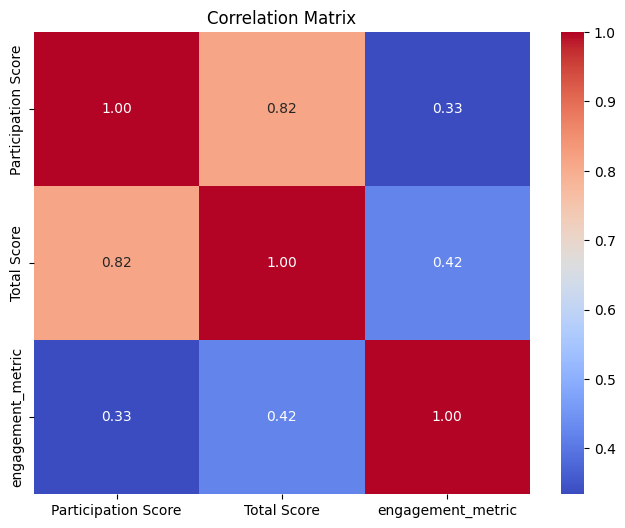

In [182]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

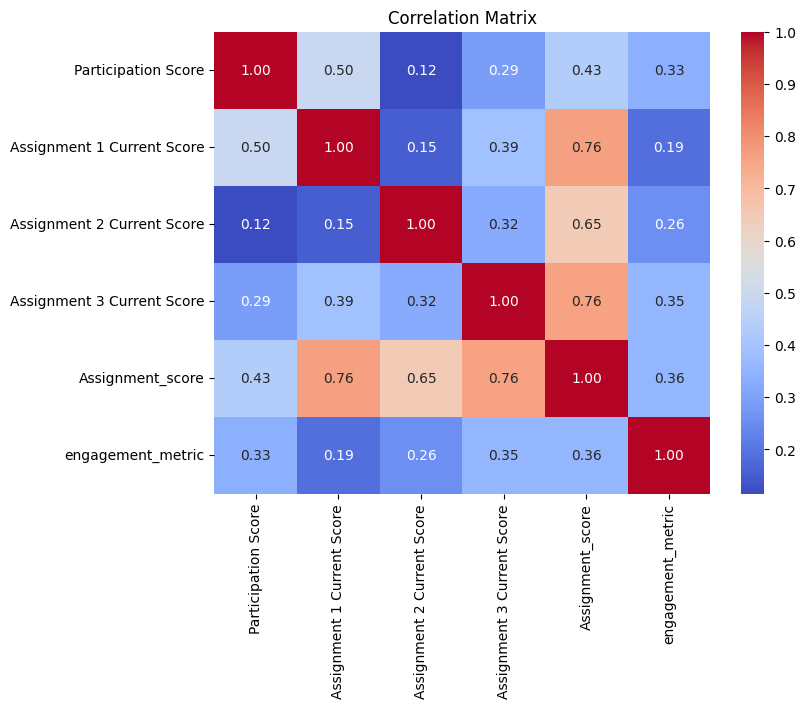

In [183]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_assignments, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [191]:
learners_corrected['actor_id'].unique()

array(['LEARNER_1', 'LEARNER_2', 'LEARNER_3', 'LEARNER_4', 'LEARNER_5',
       'LEARNER_6', 'LEARNER_7', 'LEARNER_8', 'LEARNER_9', 'LEARNER_10',
       'LEARNER_11', 'LEARNER_12', 'LEARNER_13', 'LEARNER_14',
       'LEARNER_15', 'LEARNER_16', 'LEARNER_17', 'LEARNER_18',
       'LEARNER_19', 'LEARNER_20', 'LEARNER_21', 'LEARNER_22',
       'LEARNER_23', 'LEARNER_24', 'LEARNER_25', 'LEARNER_26',
       'LEARNER_27', 'LEARNER_28', 'LEARNER_29', 'LEARNER_30',
       'LEARNER_31', 'LEARNER_32', 'LEARNER_33', 'LEARNER_34',
       'LEARNER_35', 'LEARNER_36', 'LEARNER_37', 'LEARNER_38',
       'LEARNER_39', 'LEARNER_40', 'LEARNER_41', 'LEARNER_42',
       'LEARNER_43', 'LEARNER_44', 'LEARNER_45', 'LEARNER_46',
       'LEARNER_47', 'LEARNER_48'], dtype=object)

In [211]:

# Ensure 'date' and 'time' are treated as strings and combine them into a single datetime column
data['date'] = data['date'].astype(str)
data['time'] = data['time'].astype(str)
data['discussion_datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], errors='coerce')

# Convert 'discussion_datetime' to PST
data['discussion_datetime'] = data['discussion_datetime'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')

# Extract the day of the week, hour, and month from 'discussion_datetime'
data['discussion_day_of_week'] = data['discussion_datetime'].dt.day_name()
data['discussion_hour'] = data['discussion_datetime'].dt.hour
data['discussion_month'] = data['discussion_datetime'].dt.month_name()

# Filter the dataset for discussion events using non-null values in discussion-related columns
discussion_data = data[data[['discussion_topic_message_length', 'post_message_length']].notnull().any(axis=1)]

# Apply the categorize_hour function to the 'discussion_hour' column to get the part of the day
discussion_data['part_of_day'] = discussion_data['discussion_hour'].apply(categorize_hour)

# Group by the month, day of the week and part of the day, count the number of discussion events
discussion_counts_by_month = discussion_data.groupby(['discussion_month', 'discussion_day_of_week', 'part_of_day']).size().reset_index(name='count')

# Pivot the table to get the desired format with months as well
discussion_pivot_by_month = discussion_counts_by_month.pivot_table(index=['discussion_month', 'part_of_day'], columns='discussion_day_of_week', values='count').reset_index()

# Convert the pivot table to long format
discussion_long_format_by_month = discussion_pivot_by_month.melt(id_vars=['discussion_month', 'part_of_day'], var_name='day', value_name='count').sort_values(by=['discussion_month', 'part_of_day'])

# Fill NaN values with 0
discussion_long_format_by_month.fillna(0, inplace=True)

discussion_long_format_by_month
discussion_long_format_by_month.to_csv(r'C:\Users\sarda\Desktop\UBC\Course\Learning_Analytics_Hackathon\github_files\hack-la-2023\Pattern Pioneers\data\discussion_long_format_by_month.csv')
# To include specific dates and days of the week, we need to adjust our approach.
# We'll extract the specific date (without the time) from the 'discussion_datetime' column.
data['discussion_date'] = data['discussion_datetime'].dt.date

# Add 'discussion_date' column to the 'discussion_data' dataframe
discussion_data['discussion_date'] = data['discussion_date']

# Now we group by 'discussion_month', 'discussion_date', 'discussion_day_of_week', and 'part_of_day' to count the events
discussion_counts_by_date = discussion_data.groupby(['discussion_month', 'discussion_date', 'discussion_day_of_week', 'part_of_day']).size().reset_index(name='count')

# Sort the results by month and date for readability
discussion_counts_by_date.sort_values(by=['discussion_month', 'discussion_date'], inplace=True)

# Let's take a look at the structure now
discussion_counts_by_date.head()
discussion_counts_by_date.to_csv(r'C:\Users\sarda\Desktop\UBC\Course\Learning_Analytics_Hackathon\github_files\hack-la-2023\Pattern Pioneers\data\discussion_counts_by_date.csv')


C:\Users\sarda\AppData\Local\Temp\ipykernel_15660\3823338863.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discussion_data['part_of_day'] = discussion_data['discussion_hour'].apply(categorize_hour)
C:\Users\sarda\AppData\Local\Temp\ipykernel_15660\3823338863.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discussion_data['discussion_date'] = data['discussion_date']
